## <center>  <b> NLP Navigator - Assignment 1 </b>  </center>

This is the first assignment of the project and will test your basic python skills and what you have learnt so far about the libraries like numpy and matplotlib. The problem statement and your tasks are described below. You have to rename the notebook as `{Your Name}_Assignment1.ipynb` and write all the code and then generate outputs in it. Submission will be on github and more guidelines will be given soon. The deadline to submit the assignment is `10th June 5:00 PM`

Given a set of $ n $ points in $ d $ dimensional Euclidean Space, we will find all pairs of points whose Euclidean distance is less than $ r $.

Let  $ \overrightarrow{P_1} = (P_{11},P_{12}, \ldots, P_{1d}) $ and $ \overrightarrow{P_2} = (P_{21},P_{22}, \ldots, P_{2d}) $ be two points. Then the Euclidean distance between them is equal to the norm $ \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| $.

We have to find the set $ A = \left\{(i, j): \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| \leq r \right\} $ where $ i,j \in \{1,2,3,...,n\} $.


Obviously we can find it by using 2 nested loops and searching over all pairs, but we will do the task in an optimised way. Let us make a grid where each cell is of dimension $ r \times r $. Then, (say d = 2)

![graph1](https://drive.google.com/uc?export=view&id=1qIcPgkv9Q3fI-eV5AaAobjFIYy_2siZN)

Divide the points into the cells based on their coordinates. For example, say $ 4 $ points $ \left( \frac{1}{2}, \frac{2}{3} \right), \left( \frac{2}{3}, \frac{3}{2} \right), \left( 1, 1 \right), \left( \frac{3}{2}, \frac{5}{2} \right) $ and $ r = 1 $. So the division should be like -

![graph2](https://drive.google.com/uc?export=view&id=1-u-mT1PTxOkow_uz0T8ZBjU35u63uU7F)

Now comes the observation: For any point, the points which are within distance $ d $ from it must lie in 8 adjacent cells and no where else. So, for every point, just search the points present in 8 adjacent cells, and add the valid pairs to the answer set $ A $. Please note that for corner cells, the number of adjacent cells will not be equal to 8. So, write your code including those cases also.
##### Some points for higher dimension cases:
1. Think whether the number of adjacent cells for higher dimensions will be 8 or more (or less).
2. Observe that the dimension of each cell will not be $r*r$ for each case.
##### <u>Note</u>: Assume the pair $ (i,j) $ and $ (j,i) $ to be same. So write your code accordingly. For example, in 2-D space, we will count $ ((1,2), (4,5)) $ and $ ((4,5), (1,2)) $ only once.

## Tasks TO DO:

1. Generate a set of $ 1000 $ random points in $ 2 $ dimensional space with coordinates ranging between 0 and 100.
2. For $ r = \{ 1, 2, \ldots, 10 \} $, divide the points into grid as shown. 
   - Show using matplotlib the various points using different colours.
   - Find pairs and store them in a list/set $ A $
3. Do task 1 and 2 for $ d = 3, 4, 10, 50, 100 $ (except plotting) and store the results.
(You can also plot for $ d = 3 $ but it is optional)

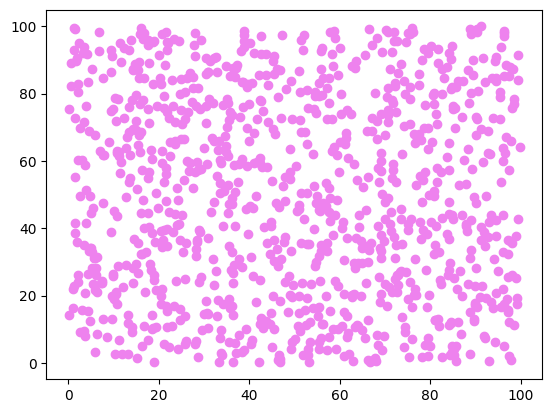

In [11]:
import numpy as np
import matplotlib.pyplot as plt



points = np.random.rand(2,1000)*100
x,y = points
plt.scatter(x,y,color = "violet")
plt.show()

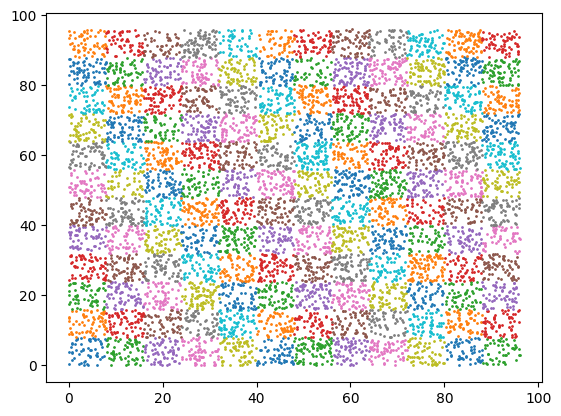

In [83]:
#this is just for 2 dimensional grid division and plotting

import numpy as np
import matplotlib.pyplot as plt
r = 8


lims = [0,100]

points = np.random.rand(10000,2)*100
lines = np.arange(lims[0],lims[1]+r,r)
pairs = set()

cells = [[[]for i in range(len(lines)-1)]for i in range(len(lines)-1)]
for i in range(len(points)):
    cells[min(int((points[i,0])/r),len(lines)-2)][min(int((points[i,1])/r),len(lines)-2)].append(i)
    
for i in range(len(lines)-2):
    for j in range(len(lines)-2):
        plt.scatter(points[cells[i][j],0],points[cells[i][j],1],s = 1)







        


    
    
    
        


        
        





In [20]:
# a generalised version for checkng neighourhood points in any dimension and then applying norm checking on only those points to find pairs
import numpy as np
import matplotlib.pyplot as plt
import math
radius = 8 #euclidean distance
dimensions = 4 #any dimension value can be entered here
no_of_points = 1000
points = np.random.rand(no_of_points,dimensions)*100
pairs = set() 

def norm(index1,index2):
    return math.sqrt(np.sum((points[index1] - points[index2])**2,axis = 0))


for i in range(no_of_points):
    targetindex = i
    for j in range(i+1,no_of_points):
        qualified = True #qualified for being in the neighbourhood
        for d in range(dimensions):
            if not((points[j,d] <= (points[i,d] + radius)) and ((points[i,d] - radius) <=points[j,d])):
                qualified = False
                break
        if qualified and norm(i,j) <= radius:
            pairs.add((min(i,j),max(i,j)))
print(pairs)  #these are  the indices of the points that are under radius distance to each other in a tuple form
#printing  an example point
point = pairs.pop()    
print(f"one of the point pair is {points[point[0]]} and {points[point[1]]} and the euclidean distance is {norm(point[0],point[1])} which is less than {radius}")         
             
                 
        




{(67, 724), (273, 664), (755, 832), (198, 359), (640, 914), (208, 546), (176, 279), (540, 546), (166, 677), (771, 918), (625, 669), (433, 984), (630, 668), (499, 639), (202, 498), (769, 936), (338, 859), (576, 898), (723, 926), (354, 952), (245, 807), (263, 276), (456, 981), (227, 255), (27, 358), (7, 791), (191, 472), (299, 874), (511, 928), (116, 426), (2, 776), (235, 581), (326, 698), (481, 667), (719, 993), (702, 864), (207, 857), (243, 795), (32, 669), (587, 687), (272, 468), (456, 587), (222, 237), (203, 306), (332, 911), (559, 920), (208, 540), (558, 964), (99, 206), (463, 888), (430, 571), (365, 752), (5, 189), (274, 442), (212, 915), (357, 894), (687, 824), (124, 228), (50, 517), (579, 726), (451, 879), (222, 333), (106, 158), (65, 928), (66, 97), (700, 865), (382, 848), (199, 882), (809, 854), (681, 845), (108, 361), (530, 975), (587, 981), (744, 763), (86, 671), (145, 931), (238, 924), (452, 966), (614, 912), (581, 680), (609, 934), (237, 333), (489, 853), (960, 975)}
one of